In [42]:
import numpy as np
from time import sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
data = pd.read_csv('ex1data1.csv')

In [44]:
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


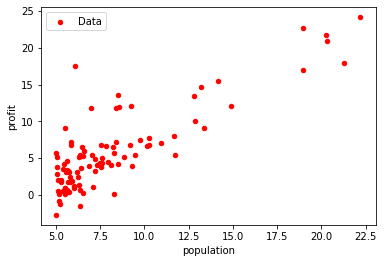

In [84]:
data.plot(x='population', y='profit', kind='scatter', color='red', label='Data')

In [46]:
X = np.array(data.values[:,0]).reshape((-1, 1))
y = np.array(data.values[:,1])

In [47]:
means, stds = np.mean(X,axis=0), np.std(X, axis=0)

In [48]:
X = (X-means)/stds

In [49]:
n = np.shape(X)[0]
ones = np.reshape(np.ones(n),(n,1))

X = np.hstack((X,ones))

In [50]:
def mserror(y, y_pred):
    return np.mean((y-y_pred)**2)

In [51]:
def linear_prediction(X, w):
    return np.dot(X,w)

In [52]:
def normal_equation(X, y):
    return np.linalg.solve(np.dot(X.transpose(),X),np.dot(X.transpose(),y))

In [53]:
#stochastic
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    return w + 2 * eta/X.shape[0] * X[train_ind] * (y[train_ind] - linear_prediction(X[train_ind], w))

In [54]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        w_new = stochastic_gradient_step(X, y, w, random_ind, eta)
        weight_dist = np.linalg.norm(w-w_new)
        w = w_new
        errors.append(mserror(y, linear_prediction(X, w)))
        iter_num += 1

        
    return w, errors

In [55]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta

In [56]:
# function to compute gradient of error function w.r.t. theta 
def gradientg(X, y, theta): 
    h = linear_prediction(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad

In [57]:
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = linear_prediction(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0]

In [58]:
def miniGradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradientg(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
  
    return theta, error_list 

In [59]:
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches

In [60]:
#stochastic_gradient_descent

In [61]:
y_med = np.median(y)
print("Error 1: ", mserror(y, y_med))

Error 1:  31.68027735357113


In [62]:
norm_eq_weights = normal_equation(X, y)
norm_eq_weights

array([4.59304113, 5.83913505])

In [63]:
lin_pred = linear_prediction(X, norm_eq_weights)
print("Error 2: ", mserror(y, lin_pred))

Error 2:  8.953942751950358


Выбрал 100000, ибо дальше ошибка не меняется.

In [64]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.zeros(X.shape[1]),max_iter=1e5)

Wall time: 3.87 s


Populating the interactive namespace from numpy and matplotlib


C:\Users\aslee\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ones']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


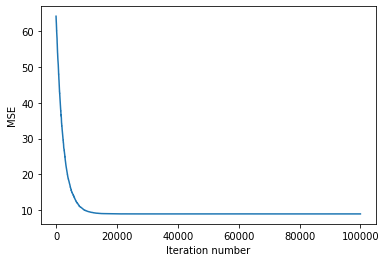

In [65]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')
show()

In [66]:
stoch_grad_desc_weights

array([4.62451163, 5.85776818])

In [67]:
stoch_errors_by_iter[-1]

8.95528033751756

In [68]:
mserror(y, linear_prediction(X, stoch_grad_desc_weights))

8.95528033751756

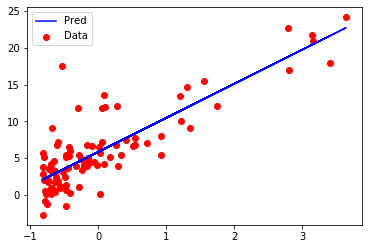

In [69]:
y_pred = linear_prediction(X, stoch_grad_desc_weights) 
plt.scatter(X[:, 0], y[:, ], color='red', label='Data')
plt.plot(X[:, 0], y_pred, color = 'blue', label='Pred') 
plt.legend()
plt.show() 

In [70]:
mserror(y, y_pred)

8.95528033751756

In [71]:
#miniGradientDescent

In [72]:
y1 = y.reshape((-1, 1))

Шаг 0.01 дает минимальную ошибку, а размер батча оставил стандартным.

In [73]:
%%time
theta, error_list = miniGradientDescent(X, y1, learning_rate = 0.01)

Wall time: 2.99 ms


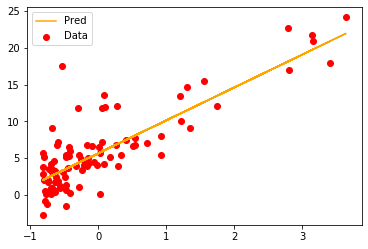

In [74]:
# predicting output for X_test 
y_pred = linear_prediction(X, theta) 
plt.scatter(X[:, 0], y1[:, ], color='red', label='Data') 
plt.plot(X[:, 0], y_pred, color = 'orange', label='Pred')
plt.legend()
plt.show() 

In [75]:
mserror(y1, y_pred)

8.999650617081068

Выбрал 10000, ибо дальше ошибка не меняется, а скорость падает. Шаг так же оставил стандартным.

In [76]:
%%time
m, n = np.shape(X)
theta = np.ones(n)
theta = gradientDescent(X, y, theta, 0.0005, 97, 10000)


Wall time: 168 ms


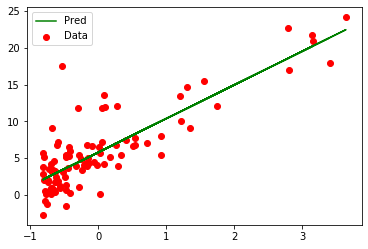

In [77]:
y_pred = linear_prediction(X, theta) 
plt.scatter(X[:, 0], y[:, ], color='red', label='Data') 
plt.plot(X[:, 0], y_pred, color = 'green', label='Pred') 
plt.legend()
plt.show() 

In [78]:
mserror(y, y_pred)

8.955587883686816

Простая линейная регрессия со scikit-learn

In [79]:
from sklearn.linear_model import LinearRegression

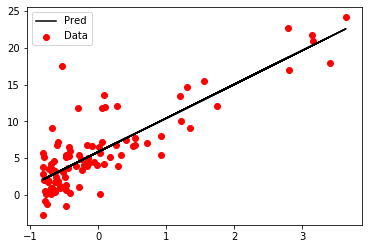

Wall time: 185 ms


In [80]:
%%time
model = LinearRegression()
model.fit(X, y)
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.scatter(X[:, 0], y[:, ], color='red', label='Data') 
plt.plot(X[:, 0], y_pred, color = 'black', label='Pred') 
plt.legend()
plt.show() 

In [81]:
mserror(y, y_pred)

8.953942751950358

Быстрее всех работает Full batch gradient descent, с учётом того, что его общая ошибка практически не отличается от других методов. По качеству, все методы приблизительно одинаковые. 